# Introduction to Neural Networks

## Import packages

In [1]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:455: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:456: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/nbuser/anaconda3_420/lib/pyth

So the first line is to import the MNIST data set. The second line is to allow us to import the load image, and array to image method, which we will use for pre-processing. Next we'll import the sequential model type from Keras. Now this is simply a linear stack of neural network layers. And this is just what we need for our neural network. Dense and shows that it will be a fully connected layer. We import the numpy package as np, and we will use matplotlib.pyplot to allow us to create plots. And that final line, matplotlib inline, allows us to view the plots in our Jupiter Notebook.

## Load the data

In [2]:
mnist.load_data()

11321344/11490434 [============================>.] - ETA: 0s

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Understanding the image data format

In [5]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

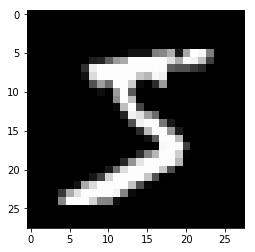

In [6]:
plt.imshow(X_train[0], cmap='gray')

In [7]:
y_train[0]

5

## Preprocessing the image data

So let's set the image height and image width variables as being of size 28 and 28. However, if we wanted to use this as our input to our neural network, we would need to reshape (28 x 28 = 784) our image so that instead of it being a 28 by 28 image, we want to have a single line that is 784 across. So that's 28 by 28 which is 784. And so we can convert that, and so what we say is x_train.reshape and for the 60,000 entries, we want to reshape that to image height multiplied by image width, and this will give us one layer with 784 neurons across. So we say x_train.

Now, let's do all this in our variable, x_train. And let's do exactly the same thing for x_test. 

So that X_train= x_test. 

In [8]:
image_height, image_width=28, 28

In [9]:
print(image_height)
print(image_width)

28
28


In [10]:
X_train=X_train.reshape(60000, image_height*image_width)

In [11]:
X_train.shape

(60000, 784)

In [12]:
X_test=X_test.reshape(10000, image_height*image_width)

In [13]:
X_test.shape

(10000, 784)

10,000 entries, and each of the images have been changed from a 28 by 28 image to a single line with 784 pixels, or neurons, in that single line.


We want to rescale our data from zero to one, as our original image is grayscale. So that means the value of the original pixels will be between zero and 255. But before we rescale our data, we will want to change the type to float so that there are no surprises when we divide by 255.

So let's confirm that our original data is in the range zero to 255, so if I type x_train, which will give me access to the first image, I can see that the range here is between zero and 255, because this is a grayscale image. 

And now let's change the type of both the train and the test type to float. So I say x_train.astype, and we want to change that to float, and let's assign that to train. So x_train equals that, and do exactly the same thing for x_test.

In [14]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [15]:
X_train=X_train.astype("float32")
X_test=X_test.astype("float32")

In [16]:
X_train[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

To scale our data between 0 and 1, we need to perfrom this step for both X_train, and x_test. Therefore, we divide that by 255. As you can see the values are now between zero and one as expected.

In [17]:
X_train=X_train / 255.0
X_test=X_test / 255.0

In [18]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Now remember the big picture is that for the training set, we have the images, so we've just converted, or reshaped our images to being of a single layer with 784 nodes. Now our output is going to be 10 different classes, so one for each digit. So let's see what the shape of our output is currently.

In [19]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


So if I type the y_train.shape, I can see that my output is in fact a one dimensional array, and that's the case for my test data too. 

So we actually want the last layer to be one where we can send out the result, or output, into one of 10 bins, representing the digits zero to nine. And we can use that, using the two categorical function that we imported earlier. So let's use two categorical, which is the "t0_categorical" method on our y_train data and y_test data because we want it to have 10 different bins.

In [20]:
y_train=to_categorical(y_train, 10)
y_train.shape

(60000, 10)

In [21]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [22]:
y_test=to_categorical(y_test, 10)
y_test.shape

(10000, 10)

Now, I can see that now y_train has gone from a one dimensional array to one with now 10 separate bins or classes. I do exactly the same thing for y_test. So we can see now the output from a model will then go into one of these 10 bins, representing the 10 digits that we have.

## Build a model

So let's just visualize the model that we are trying to create, and remember that the reason that we're going from 784 nodes, that's the original number of pixels that we had, if you multiply 28 by 28. We then go down to 512 nodes in each of these layers, and then we need to go down to 10 nodes, because our output needs to be one of 10 digits, that's zero to nine, and that's why we end up with 10 nodes in our final output layer.

![Neural Net Picture]( images/neural-net.png)

So let's create our neural network, and we use that using Keras' sequential, so you call it model equals sequential, and then we're going to add the fully connected nodes, and we do that by using Keras' model add method, and we want to use a fully connected node, so we use dense. Now if you want to know the parameters that the dense mode is expecting, if we type a shift and a tab twice, you can see that it's expecting an output node.

So we specify dense, we know that we're going to have 512 output nodes, we specify what activation function we want to use. So in this instance, we will use relu, and specify our input shape. So the input shape is going to be 784 pixels that we have for our image. So 784, and we've then created the first layer of our neural network model. 

We create the next layer by saying model add, dense, and then we know that the second layer's going to have 512 nodes. We use activation function of relu again, and this time we don't need to specify the input node because Keras is able to determine that, and we know that the number of input nodes is, in fact, 512. We add the final layer, which is our output layer, and we say model add dense, and our final layer will have an output of 10 nodes, and this time 'round, we will be using softmax as our activation function because we want, as our output, one of the 10 classes. So we create our model in this way.

In [23]:
# Load the model
model=Sequential()

In [24]:
#First Layer
model.add(Dense(512, activation='relu',  input_shape=(784,)))
#Second Layer, here I don't need to specify the inputs
model.add(Dense(512, activation='relu'))
#Output Layer
model.add(Dense(10, activation='softmax'))

Before we can train our model, we'll need to compile our model so let's do a model.compile and look at the options available to us.

## Compile the model

We can use shift and tab inside the complie and we can see that we need to specify "an optimizer, a loss function, and the metrics". 

So for an optimizer, we will use Adam as that is our go-to optimizer in general.

For the loss function, we're going to be using categorical cross entropy. And the reason for this is because our output is going to be 10 classes or 10 bins and the categorical cross entropy allows for that.

And finally, we need to specify that the metrics is accuracy.

In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

 We need to just confirm that our model is as we expect so we type model.summary. 

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


And we can see that our model has two layers, the first one with 512 nodes, the second layer also with 512 nodes, and the final layer, or the output layer, with 10 nodes. 

**parameters**: So let's talk a little bit about how we get the number of parameters. Well, we can see that we've got originally 784 inputs because those correspond to the number of pixels that we have and those are terminating into 512 nodes and we need to include a bias.

401920 = 784 (input pixels or Neurons) x 512 + 512 (Bias)

So I have 784 pixels and I multiply that by 512 because it's terminating into 512 nodes. We can see that number of parameters that I have is 401,408. I then need to add the bias which is 512 for that layer and you end up with the number of parameters for that first layer. 

Moving onto the next layer,

262656 = 512 (input pixels or Neurons) x 512 + 512 (Bias)

I've got 512 input nodes going into 512 nodes and then I have 512 parameters here. And I get the total number of parameters as 262,656.

And finally, in the last layer,

5130 = 512 (input pixels or Neurons) x 10 + 10 (Bias)

We've got 512 nodes going into 10 nodes and I have 10 as my bias and I end up with 5,130. In the next video, we will look at training our model.

## Train the model

So we've complied our model, let's look at training it. So go to model.fit, and we look at the parameters that we need to specify.

So, we need to provide the X_trrain, y_train, number of epochs = the number of times the model goes through the training data. 

And we need to provide a parameter for the validation data (X_test, y_test). 

So now, we need to put that into a variable. So, let's call that History, and we run that cell. So, we can see that we have now completed training of our model and this is stored in the History object. We can see that the model is doing pretty well. And we can see for the validation data set that it has an accuracy of about 98.27%.

In [27]:
History=model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 30s - loss: 0.1854 - acc: 0.9439 - val_loss: 0.1180 - val_acc: 0.9613
Epoch 2/20
60000/60000 [==============================] - 27s - loss: 0.0803 - acc: 0.9748 - val_loss: 0.0722 - val_acc: 0.9778
Epoch 3/20
60000/60000 [==============================] - 28s - loss: 0.0568 - acc: 0.9821 - val_loss: 0.0828 - val_acc: 0.9765
Epoch 4/20
60000/60000 [==============================] - 27s - loss: 0.0431 - acc: 0.9861 - val_loss: 0.0828 - val_acc: 0.9766
Epoch 5/20
60000/60000 [==============================] - 28s - loss: 0.0349 - acc: 0.9891 - val_loss: 0.0727 - val_acc: 0.9813
Epoch 6/20
60000/60000 [==============================] - 27s - loss: 0.0279 - acc: 0.9911 - val_loss: 0.1041 - val_acc: 0.9743
Epoch 7/20
60000/60000 [==============================] - 28s - loss: 0.0224 - acc: 0.9931 - val_loss: 0.0971 - val_acc: 0.9770
Epoch 8/20
60000/60000 [==============================

## What is accuracy of the training model

So let's look at the accuracy of the model. Now remember that this is stored in the History object, so if we want to plot the accuracy, we will use Matploblib's and we can see that the accuracy of our model tends towards 99%.

### Plot the accuracy of the training model

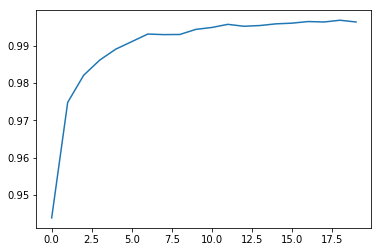

In [28]:
plt.plot(History.history['acc'] )

And now let's plot the validation accuracy of the model, so I'm going to use the original accuracy, and I'm going to add the validation accuracy to the model here. 

### Plot the accuracy of training and validation set

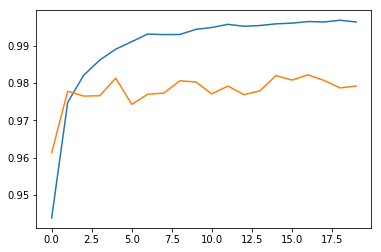

In [29]:
plt.plot(History.history['acc'] )
plt.plot(History.history['val_acc'] )

we can see that the accuracy of the training set is much higher than that of the evaluation data set, networks.

Now let's compare the accuracy of the training set, the accuracy of the validation set, and the loss of the model.

### Accuracy of training and validation with loss

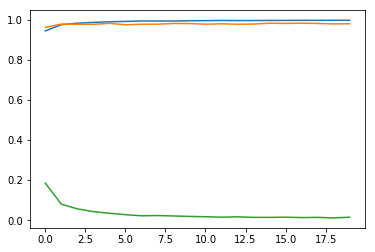

In [30]:
plt.plot(History.history['acc'] )
plt.plot(History.history['val_acc'] )
plt.plot(History.history['loss'] )

So we copy the accuracy and the validation accuracy from the previous section, and added the loss argument above. And we can see that the top line (blue) is the training accuracy, the second line (the orange line) is the validation accuracy, and finally, we can see that the bottom line there is the loss.

We can also check the accuracy of our model using the **evaluate method**. 

## Evaluating the Model

So we call our model, and evaluate using  "model.evaluate()".

In [31]:
score = model.evaluate(X_test, y_test)

 9952/10000 [============================>.] - ETA: 0s

In [32]:
score

[0.13578437021042347, 0.9792]

Now we can see that score is in fact a list, and it gives us the accuracy of our data as being 97.94% for our neural network model. And you can see that our model has an accuracy of about 97.78%, which is very good for a neural network model. 

# Convolution Neural Network: The same task as above but with CNN

## Import the libraries

In [33]:
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

In neural networks, we only had the fully connected layer, otherwise known as the dense layer. With convolution neural networks, we have far more operations, such as the convolution operation, max pooling, flattening, and also a fully connected or dense layer.

We'll use sequential models, because this will give us a linear stack of neural network layers, and we'll use the MNIST data set as in the previous example, as this is one of the data sets available with Keras. 

And finally, two categorical allows us to reshape the data and then show the labeled data has 10 categories or bins. 

Remember that we have absolutely no idea what format the MNIST data is stored in, so we need to read the documentation. And this tells us that a Tupple of Numpy arrays has returned. 60,000 of the images are to be used for training model, and 10,000 for validating the model.

So if we put my cursor in load underscore data, and hit shift and tab, I can see that a Tupple of Numpy arrays has returned. So we can confirm the shape of my train and test data, and let's move on to pre-processing.

## Load the data

In [34]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [35]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Now our MNIST images only have a depth of one (they are balck images - color less, not RGB (red,gree,blue)), but we must explicitly declare that, and then reshape our data. 

We want to rescale our data so that it's between zero and one, as our image's gray scale. The value of each pixel will be between 0 and 255. Before we rescale our data, we'll want to change the type to float. And we can confirm the change in shape to our dataset. 

## Pre-processing

In [37]:
batch_size = 128
num_classes = 10
epochs = 3


X_train_CNN = X_train.reshape(60000,28,28,1)
X_test_CNN = X_test.reshape(10000,28,28,1)
X_train_CNN = X_train_CNN.astype('float32')
X_test_CNN = X_test_CNN.astype('float32')
X_train_CNN /= 255.0
X_test_CNN /= 255.0
y_train_CNN = to_categorical(y_train,num_classes)
y_test_CNN = to_categorical(y_test, num_classes)

In [38]:
print(X_train_CNN.shape)
print(y_train_CNN.shape)
print(X_test_CNN.shape)
print(y_test_CNN.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


So, this pciture shows the model we are going to train and test.

![CNN Model]( images/cnn-model.jpg)

We have our original image which is 28 by 28 with one channel so it's a grayscale image. We then do the convolution operation with the five by five kernel and then there are 32 filters. We then do a pooling so our image drops from 24 by 24 to 12 by 12. We then do another convolution operation with the five by five kernel and this time with 64 filters. We do another pooling. Again, we see a reduction in our image by half. That's from eight by eight to four by four. Finally, there's a flattening so there's a fully connected network. Then we've got the output. We've got all of the 1,024 notes terminating in the ten outputs. The ten outputs correspond to the ten digits, zero to 9. 

## Use the model

The first thing we want is to create a sequential model so let's call our model 'cnn'. We then want to add our convolution layer. Using the model 'cnn', add we pick convolution 2D. Notice that our first parameter is going to be the number of filters that we have. We have 32 filters. The kernel size for each filter is going to be five by five. The input shape corresponds to the input shape of our model so that's 28 by 28 by one because it's a grayscale image. Then we have padding equals same. If you look at the documentation, if I type shift and tab, the options available to you in padding are either valid or same. Then we use our 'relu' activation function. We add the convolution layer. We've got to change the kernel size to kernel size equals five by five. We then add our next layer which is a max pooling layer. Our model, add, then we add the max layer. Max pooling 2D. We then want to add another convolution layer so 'cnn' add. But this time, we have 64 filters. We have a kernel size of five by five again. This time, we also don't need to specify the input shape because Kares can infer that. We have the same padding. Padding equals same. We have our 'relu' activation. We need to add another bracket at the end of that. Then we add our next layer which is another max pooling layer. Then we want to flatten the network. The reason we want to flatten the network is because we've got a dense network or a fully connected network coming next. We add our fully connected network or dense layer which has 1,024 notes with an activation of 'relu'. We have another fully connected layer and this is going to be our output layer which will have the ten bins or ten classes. Because this is the output layer where we will have ten different classes or bins, this needs to be a soft max layer.

Our model is created. The next thing we need to do is to compile it.

Remember our first parameter is the optimizer. We'll use the general one which is 'adam'. Our next one is the 'loss' function. This time because our output has ten possible classes, we want to use the categorical cross entropy. Finally, we want to use accuracy for the metrics. In last, print of the model  using "cnn.summary()".


In [39]:
cnn = Sequential()
#First Layer
cnn.add(Conv2D(32, kernel_size=(5,5), input_shape=(28,28,1), padding='same', activation='relu'))
#Max Pooling Layer
cnn.add(MaxPooling2D())
#Second Layer
cnn.add(Conv2D(64, kernel_size=(5,5),padding='same', activation='relu'))
#Second Max Pooling Layer
cnn.add(MaxPooling2D())
# Flatten the fully connected Network
cnn.add(Flatten())
#1024 nodes
cnn.add(Dense(1024,activation='relu'))
#10 different classes or bins, this is output layer
cnn.add(Dense(10,activation='softmax'))
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(cnn.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              3212288   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                10250     
Total para

 We can see that this model corresponds to the diagram that we had at the start. Notice that we also have zero parameters for max pooling and for flatten. This is because it computes a fixed function of the input. 

## Train the model

When training this model it will take between 15 to 20 minutes per epoch. So you can train the model this way if you want, but we can left the code commented out since I have already trained the model before. therefore, we can use an alternate way of determining the weights. Now Keras allows us to do that very easily, so all we need to do is type the model name, cnn, load_weights, and the weights is stored in the folder weights, and it's called cnn-model5.h5. So what we have done here is that we have identical models, but the only difference is that instead of having to wait for this model to train we've been able to use weights that I have trained on the identical model and be able to move ahead with this step.

In [40]:
#history_cnn = cnn.fit(X_train,y_train,epochs=20,verbose=1,validation_data=(X_train,y_train))

In [41]:
 cnn.load_weights('weights/cnn-model5.h5')

### Evaluate the Model

In [42]:
score_CNN= cnn.evaluate(X_test_CNN, y_test_CNN )

10000/10000 [==============================] - 16s    


In [43]:
score_CNN

[0.026782706336791945, 0.993]

So now we can evaluate the accuracy of the model. So type cnn, evaluate, and remember that the two parameters are x test and y test and let's store that in score. Now if you recall, in our neural networks model we had an accuracy of 97.78%. So let's take a look at how well our convolution neural network does. So remember that score is a list. And we're looking for the second argument. And so we can see that the accuracy of our convolution neural network is 97.7 or 97.3%, which is better than that of our neural network model. Now the difference between 97.8% and 99.3% might not seem significant, but when you're looking at thousands or tens of thousands of images that small difference in percentage can make a huge difference between the predictive accuracy and capability of a model. In the next video we will look at enhancements to convolution neural networks.